# Jet Rail Investment

### Problem Definition

## Exploratory Data Analysis

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data/Train.csv')
data.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
ID          18288 non-null int64
Datetime    18288 non-null object
Count       18288 non-null int64
dtypes: int64(2), object(1)
memory usage: 428.7+ KB


### Convert the datetime column to Datetime

In [4]:
data['Datetime'] = pd.to_datetime(data['Datetime'], format='%d-%m-%Y %H:%M')
data.head()

,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2


### Find the intervals between the collection of data

In [5]:
data.Datetime.diff()

0            NaT
1       01:00:00
2       01:00:00
3       01:00:00
4       01:00:00
5       01:00:00
6       01:00:00
7       01:00:00
8       01:00:00
9       01:00:00
10      01:00:00
11      01:00:00
12      01:00:00
13      01:00:00
14      01:00:00
15      01:00:00
16      01:00:00
17      01:00:00
18      01:00:00
19      01:00:00
20      01:00:00
21      01:00:00
22      01:00:00
23      01:00:00
24      01:00:00
25      01:00:00
26      01:00:00
27      01:00:00
28      01:00:00
29      01:00:00
          ...   
18258   01:00:00
18259   01:00:00
18260   01:00:00
18261   01:00:00
18262   01:00:00
18263   01:00:00
18264   01:00:00
18265   01:00:00
18266   01:00:00
18267   01:00:00
18268   01:00:00
18269   01:00:00
18270   01:00:00
18271   01:00:00
18272   01:00:00
18273   01:00:00
18274   01:00:00
18275   01:00:00
18276   01:00:00
18277   01:00:00
18278   01:00:00
18279   01:00:00
18280   01:00:00
18281   01:00:00
18282   01:00:00
18283   01:00:00
18284   01:00:00
18285   01:00:

### Visualize the data

In [6]:
data = data.set_index(data['Datetime'])
data.head()

,ID,Datetime,Count
Datetime,,,
2012-08-25 00:00:00,0,2012-08-25 00:00:00,8
2012-08-25 01:00:00,1,2012-08-25 01:00:00,2
2012-08-25 02:00:00,2,2012-08-25 02:00:00,6
2012-08-25 03:00:00,3,2012-08-25 03:00:00,2
2012-08-25 04:00:00,4,2012-08-25 04:00:00,2


In [7]:
data.drop(['Datetime'], axis=1, inplace=True)
data.head()

,ID,Count
Datetime,,
2012-08-25 00:00:00,0,8
2012-08-25 01:00:00,1,2
2012-08-25 02:00:00,2,6
2012-08-25 03:00:00,3,2
2012-08-25 04:00:00,4,2


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

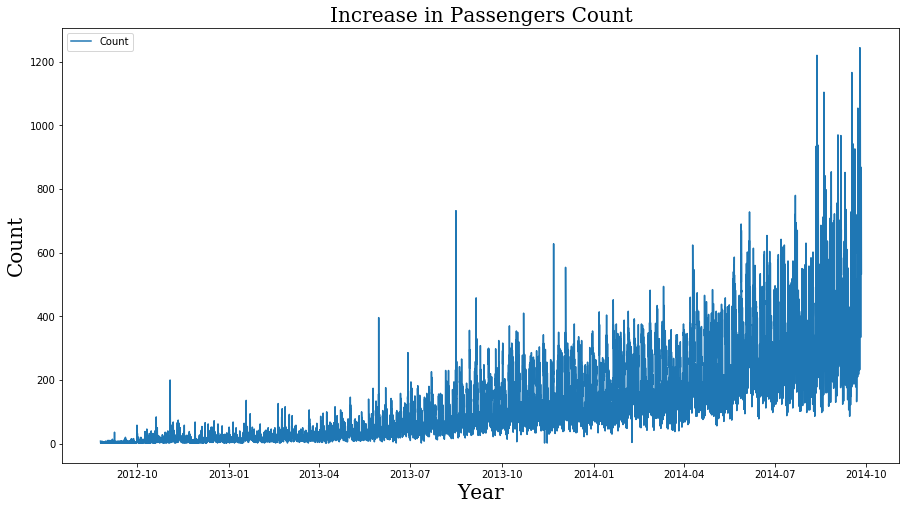

In [9]:
font_dict = {
    'family': 'serif',
    'weight': 'normal',
    'size': 20
}
plt.figure(figsize=(15, 8))
plt.plot(data.Count)
plt.legend()
plt.xlabel('Year', fontdict=font_dict)
plt.ylabel('Count', fontdict=font_dict)
plt.title('Increase in Passengers Count', fontdict=font_dict)
plt.savefig('Visualization/Visualize-data.png')
plt.show()

In [10]:
yearly_data = data.resample('Y').sum()
yearly_data.head()

,ID,Count
Datetime,,
2012-12-31,4791060,34932
2013-12-31,65485380,685968
2014-12-31,96939888,1820366


In [11]:
yearly_data.index = ['2012', '2013', '2014']
yearly_data

,ID,Count
2012,4791060,34932
2013,65485380,685968
2014,96939888,1820366


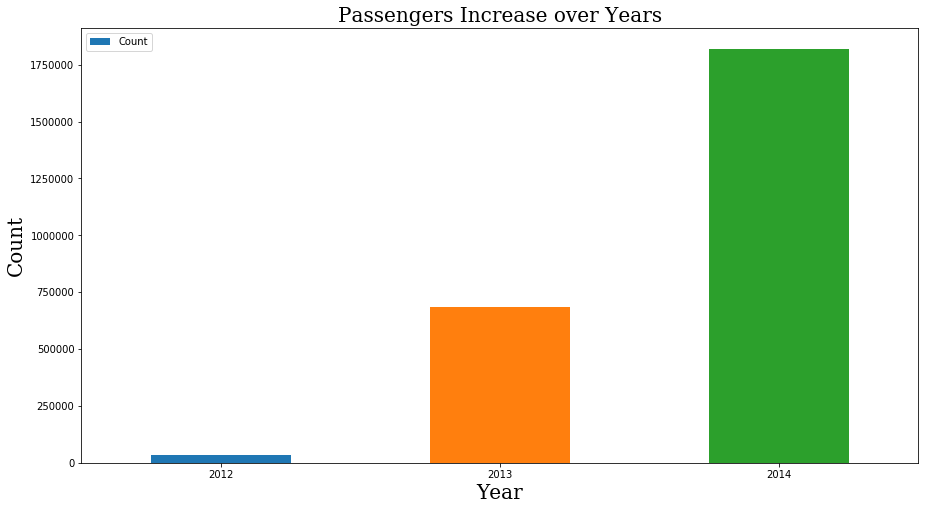

In [12]:
font_dict = {
    'family': 'serif',
    'weight': 'normal',
    'size': 20
}
plt.figure(figsize=(15, 8))
yearly_data.Count.plot.bar()
plt.legend(loc='upper left')
plt.xlabel('Year', fontdict=font_dict)
plt.xticks(rotation=0)
plt.ylabel('Count', fontdict=font_dict)
plt.title('Passengers Increase over Years', fontdict=font_dict)
plt.savefig('Visualization/Passengers-Count-Year-Wise.png')
plt.show()

In [13]:
monthly_data = data.resample('M').sum()
monthly_data.head()

,ID,Count
Datetime,,
2012-08-31,14028,496
2012-09-30,379800,3200
2012-10-31,937068,8174
2012-11-30,1433880,11396
2012-12-31,2026284,11666


In [14]:
monthly_data = data.groupby(data.index.month).sum()
monthly_data.head()

,ID,Count
Datetime,,
1,11677080,138112
2,11498592,149448
3,13784088,154442
4,14393520,198260
5,15962520,230722


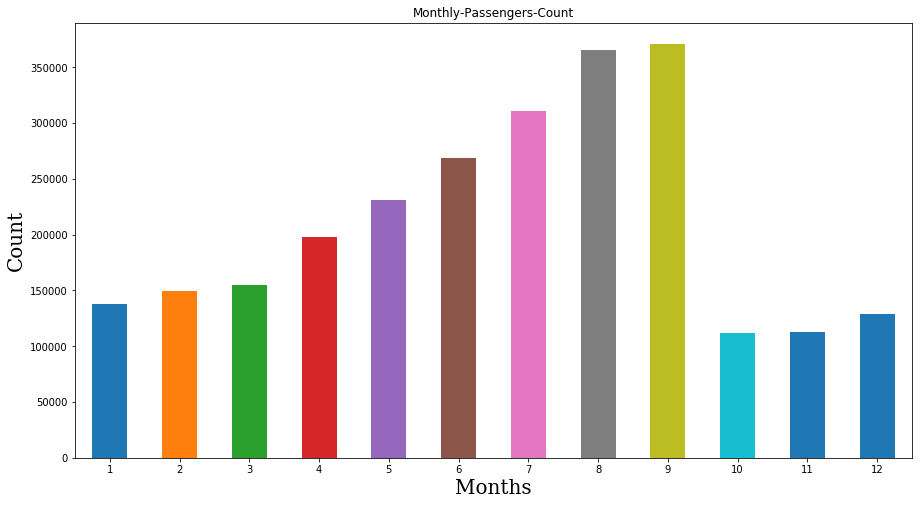

In [15]:
font_dict = {
    'family': 'serif',
    'weight': 'normal',
    'size': 20
}
plt.figure(figsize=(15, 8))
monthly_data.Count.plot.bar()
plt.xlabel('Months', fontdict=font_dict)
plt.xticks(rotation=0)
plt.ylabel('Count', fontdict=font_dict)
plt.title('Monthly-Passengers-Count')
plt.savefig('Visualization/Monthly-Passengers-Count.png')
plt.show()

In [16]:
daily_data = data.groupby(data.index.weekday).sum()
daily_data

,ID,Count
Datetime,,
0,23888004,412916
1,23950788,430988
2,24013572,427022
3,24076356,407250
4,23699952,375122
5,23762436,251292
6,23825220,236676


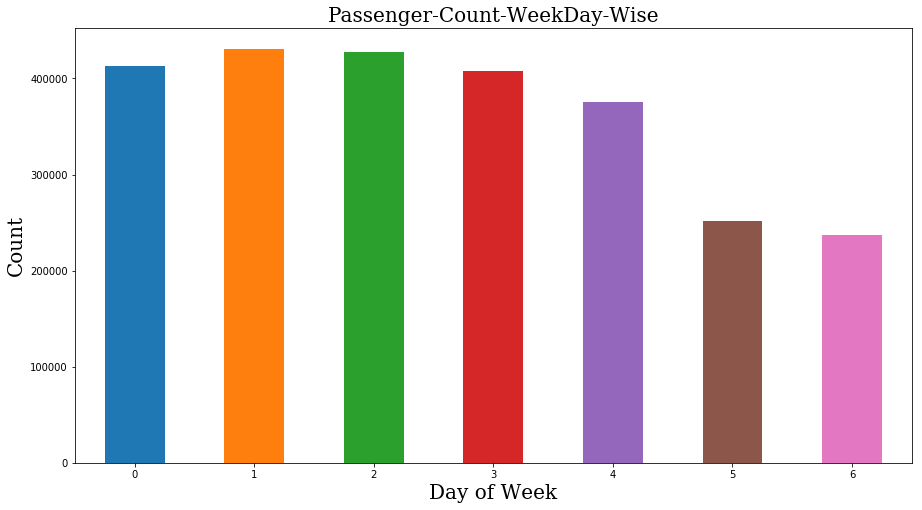

In [17]:
font_dict = {
    'family': 'serif',
    'weight': 'normal',
    'size': 20
}
plt.figure(figsize=(15, 8))
daily_data.Count.plot.bar()
plt.xlabel('Day of Week', fontdict=font_dict)
plt.xticks(rotation=0)
plt.ylabel('Count', fontdict=font_dict)
plt.title('Passenger-Count-WeekDay-Wise', fontdict=font_dict)
plt.savefig('Visualization/Passenger-Count-Daily.png')
plt.show()

In [18]:
week_day = data.groupby(data.index.weekday_name).sum()
week_day

,ID,Count
Datetime,,
Friday,23699952,375122
Monday,23888004,412916
Saturday,23762436,251292
Sunday,23825220,236676
Thursday,24076356,407250
Tuesday,23950788,430988
Wednesday,24013572,427022


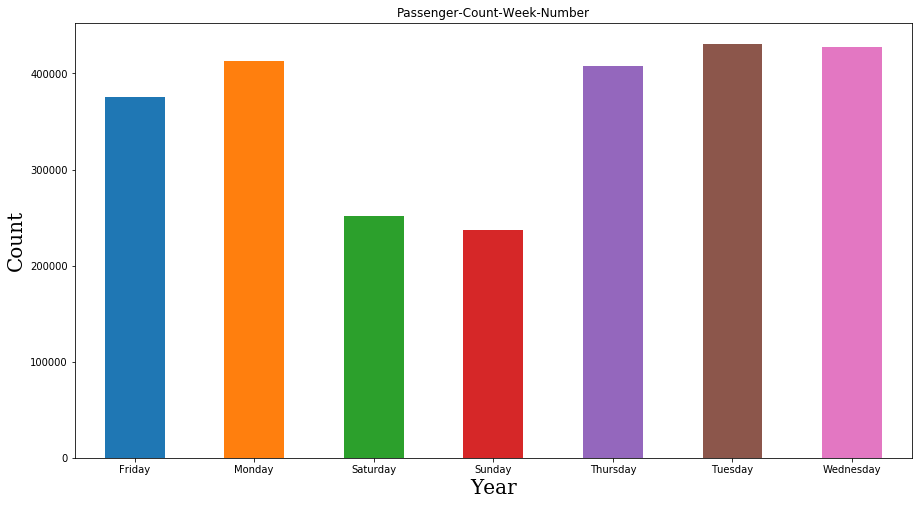

In [19]:
font_dict = {
    'family': 'serif',
    'weight': 'normal',
    'size': 20
}
plt.figure(figsize=(15, 8))
week_day.Count.plot.bar()
plt.xlabel('Year', fontdict=font_dict)
plt.ylabel('Count', fontdict=font_dict)
plt.xticks(rotation=0)
plt.title('Passenger-Count-Week-Number')
plt.savefig('Visualization/Passenger-Count-Week-Number.png')
plt.show()

In [20]:
hourly_data = data.groupby(data.index.hour).sum()
hourly_data

,ID,Count
Datetime,,
0,6958584,112544
1,6959346,89816
2,6960108,76012
3,6960870,62806
4,6961632,52864
5,6962394,47322
6,6963156,50884
7,6963918,59012
8,6964680,67956


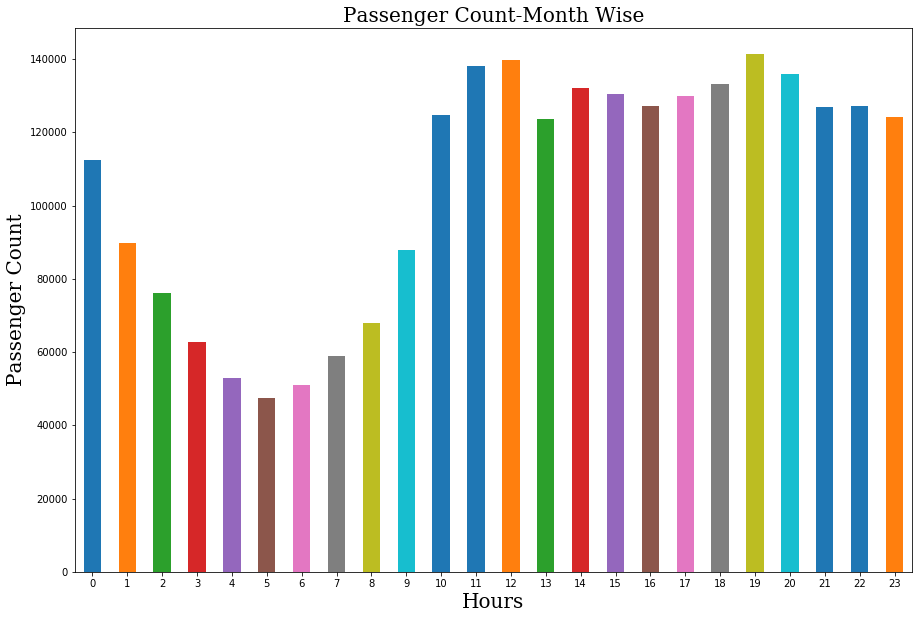

In [21]:
font_dict = {
    'family': 'serif',
    'weight': 'normal',
    'size': 20
}
plt.figure(figsize=(15, 10))
hourly_data.Count.plot.bar()
plt.xlabel('Hours', fontdict=font_dict)
plt.xticks(rotation=0)
plt.ylabel('Passenger Count', fontdict=font_dict)
plt.title('Passenger Count-Month Wise', fontdict=font_dict)
plt.savefig('Visualization/Passenger-Count-Month-Wise.png')
plt.show()

### Resample the data to daily users

In [22]:
daily_data = data.resample('D').mean()
daily_data.head()

,ID,Count
Datetime,,
2012-08-25,11.5,3.166667
2012-08-26,35.5,3.666667
2012-08-27,59.5,2.583333
2012-08-28,83.5,2.416667
2012-08-29,107.5,2.500000


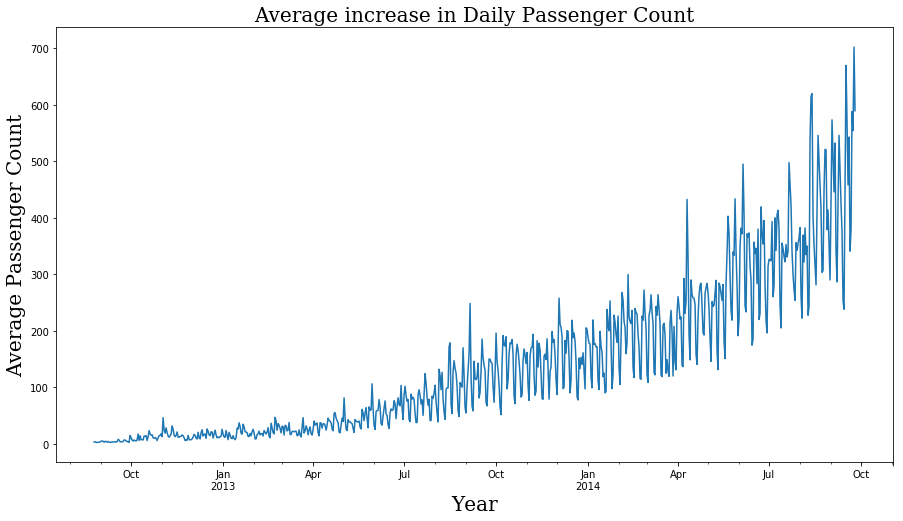

In [23]:
font_dict = {
    'family': 'serif',
    'weight': 'normal',
    'size': 20
}
plt.figure(figsize=(15, 8))
daily_data.Count.plot()
plt.xlabel('Year', fontdict=font_dict)
plt.ylabel('Average Passenger Count', fontdict=font_dict)
plt.title('Average increase in Daily Passenger Count', fontdict=font_dict)
plt.savefig('Visualization/Average-Daily-Passenger-Count.png')
plt.show()

### Split the data into train and validation data

In [24]:
training_data = daily_data.loc[:'2014-06-24']
validation_data = daily_data.loc['2014-06-25':]
training_data.tail()

,ID,Count
Datetime,,
2014-06-20,15947.5,379.916667
2014-06-21,15971.5,220.083333
2014-06-22,15995.5,230.833333
2014-06-23,16019.5,419.416667
2014-06-24,16043.5,372.166667


In [25]:
validation_data.head()

,ID,Count
Datetime,,
2014-06-25,16067.5,353.666667
2014-06-26,16091.5,395.250000
2014-06-27,16115.5,282.333333
2014-06-28,16139.5,218.250000
2014-06-29,16163.5,196.250000


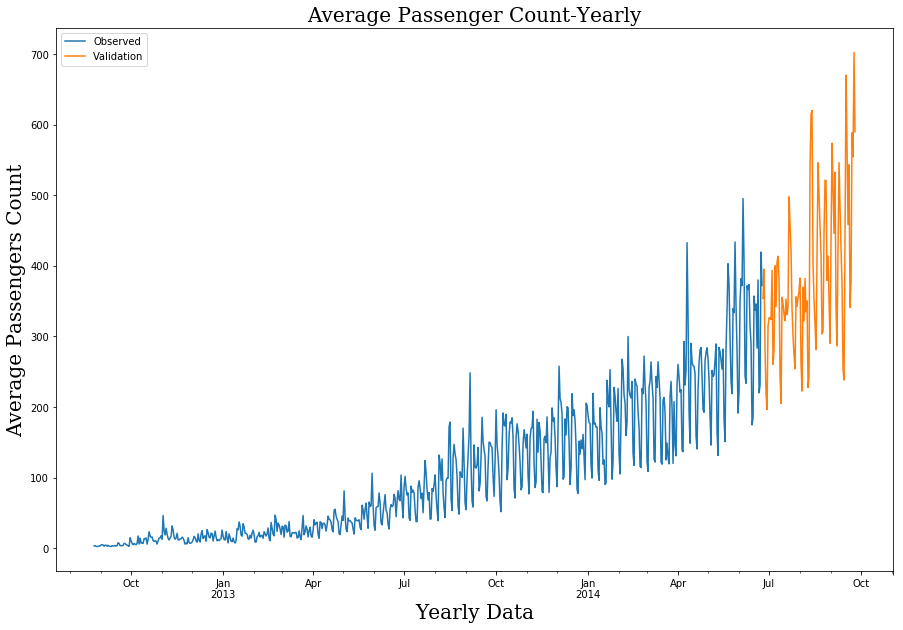

In [26]:
font_dict = {
    'family': 'serif',
    'weight': 'normal',
    'size': 20
}
plt.figure(figsize=(15, 10))
training_data.Count.plot(label='Observed')
validation_data.Count.plot(label='Validation')
plt.xlabel('Yearly Data', fontdict = font_dict)
plt.ylabel('Average Passengers Count', fontdict = font_dict)
plt.legend()
plt.title('Average Passenger Count-Yearly', fontdict = font_dict)
plt.savefig('Visualization/Average-Passenger-Count-Observed-vs-Validation.png')
plt.show()

## Forecasting Methods

### Important Terms - 

#### Note:

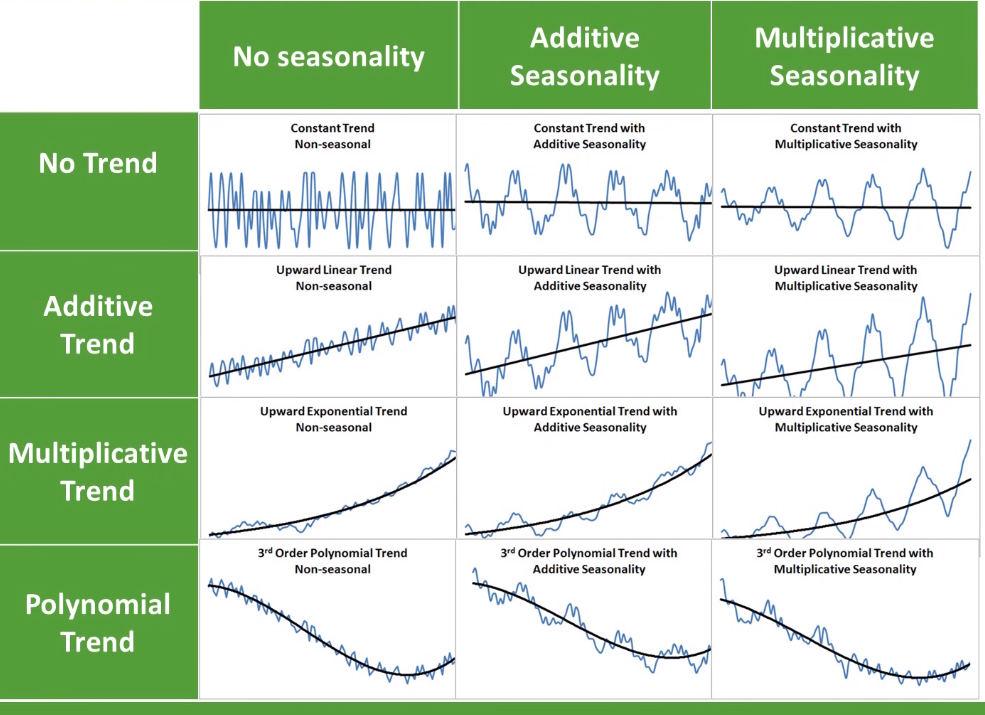

In [27]:
from IPython.display import Image
Image("Trend-Seasonality-Additive-Multiplicative.png")

### View all the above mentioned terms in our data set.

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [29]:
terms = seasonal_decompose(daily_data, model='additive')

c:\users\jatinder\appdata\local\programs\python\python36\lib\site-packages\scipy\signal\signaltools.py:491: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return x[reverse].conj()


In [30]:
print("Level/Observed in the dataset is: ", terms.observed)
print("Trend in the dataset is: ", terms.trend)
print("Seasonal in the dataset is: ", terms.seasonal)
print("Noise/Residual in the dataset is: ", terms.resid)

Level/Observed in the dataset is:                   ID       Count
Datetime                       
2012-08-25     11.5    3.166667
2012-08-26     35.5    3.666667
2012-08-27     59.5    2.583333
2012-08-28     83.5    2.416667
2012-08-29    107.5    2.500000
2012-08-30    131.5    3.083333
2012-08-31    155.5    3.250000
2012-09-01    179.5    4.666667
2012-09-02    203.5    4.916667
2012-09-03    227.5    4.500000
2012-09-04    251.5    2.750000
2012-09-05    275.5    4.333333
2012-09-06    299.5    4.166667
2012-09-07    323.5    2.833333
2012-09-08    347.5    4.166667
2012-09-09    371.5    2.833333
2012-09-10    395.5    2.666667
2012-09-11    419.5    2.416667
2012-09-12    443.5    3.500000
2012-09-13    467.5    3.000000
2012-09-14    491.5    3.500000
2012-09-15    515.5    3.833333
2012-09-16    539.5    2.916667
2012-09-17    563.5    3.833333
2012-09-18    587.5    7.833333
2012-09-19    611.5    6.583333
2012-09-20    635.5    3.500000
2012-09-21    659.5    3.750000
2012-

### Visualize the Level, Trend, Seasonality and Residual from the dataset

In [31]:
import statsmodels.api as sm

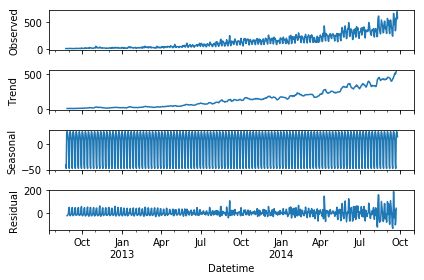

In [32]:
sm.tsa.seasonal_decompose(daily_data.Count).plot()
result = sm.tsa.stattools.adfuller(daily_data.Count)
plt.show()

### Naive Approach

In [33]:
naive_value = training_data.Count.iloc[-1]
naive_value

372.1666666666667

In [34]:
naive_approach = validation_data.copy()

In [35]:
naive_list = [naive_value for i in range(naive_approach.shape[0])]
len(naive_list)

93

In [36]:
naive_approach.shape[0]

93

In [37]:
naive_approach['Naive'] = naive_list
naive_approach.head()

,ID,Count,Naive
Datetime,,,
2014-06-25,16067.5,353.666667,372.166667
2014-06-26,16091.5,395.250000,372.166667
2014-06-27,16115.5,282.333333,372.166667
2014-06-28,16139.5,218.250000,372.166667
2014-06-29,16163.5,196.250000,372.166667


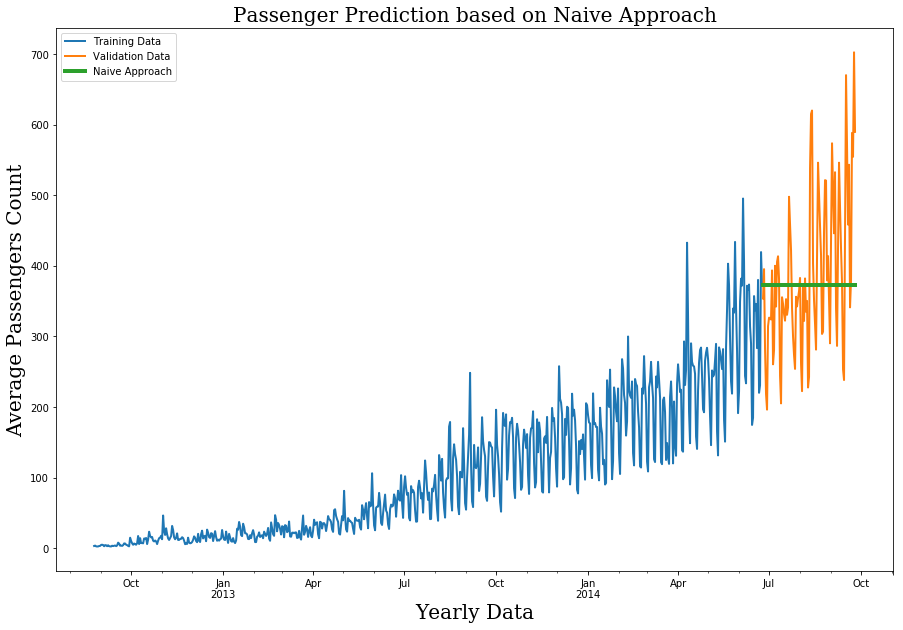

In [38]:
font_dict = {
    'family': 'serif',
    'weight': 'normal',
    'size': 20
}
plt.figure(figsize=(15, 10))
training_data.Count.plot(label = 'Training Data', linewidth=2)
validation_data.Count.plot(label = 'Validation Data', linewidth=2)
naive_approach.Naive.plot(label = 'Naive Approach', linewidth=4)
plt.legend()
plt.xlabel('Yearly Data', fontdict=font_dict)
plt.ylabel('Average Passengers Count', fontdict=font_dict)
plt.title('Passenger Prediction based on Naive Approach', fontdict=font_dict)
plt.savefig('Visualization/Prediction-Naive-Approach.png')
plt.show()

### Evaluating Naive Approach

In [39]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [40]:
rmse = sqrt(mean_squared_error(naive_approach.Naive, validation_data.Count))
print(rmse)

111.79050467496724


### Moving Approach

In [41]:
moving_approach = validation_data.copy()

In [42]:
moving_value = training_data.Count.rolling(30).mean().iloc[-1]
print(moving_value)

321.43333333333345


In [43]:
moving_approach_list = [moving_value for i in range(validation_data.shape[0])]
moving_approach['Moving'] = moving_approach_list

In [44]:
moving_approach.Moving.head()

Datetime
2014-06-25    321.433333
2014-06-26    321.433333
2014-06-27    321.433333
2014-06-28    321.433333
2014-06-29    321.433333
Freq: D, Name: Moving, dtype: float64

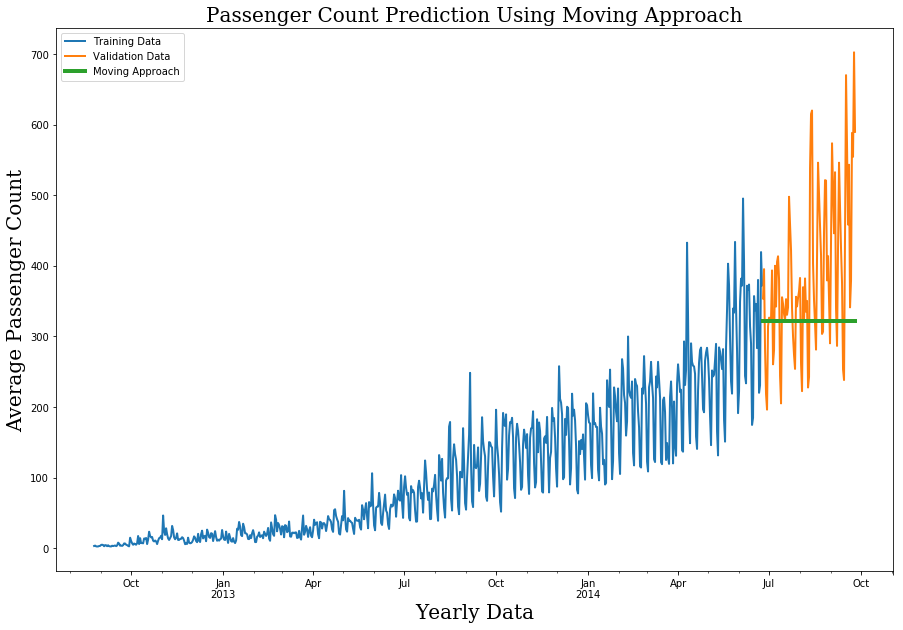

In [45]:
font_dict = {
    'family': 'serif',
    'size': 20
}
plt.figure(figsize=(15, 10))
training_data.Count.plot(label = 'Training Data', linewidth=2)
validation_data.Count.plot(label = 'Validation Data', linewidth=2)
moving_approach.Moving.plot(label='Moving Approach', linewidth=4)
plt.xlabel('Yearly Data', fontdict=font_dict)
plt.ylabel('Average Passenger Count', fontdict=font_dict)
plt.legend()
plt.title('Passenger Count Prediction Using Moving Approach', fontdict=font_dict)
plt.savefig('Visualization/Prediction-Moving-Approach.png')
plt.show()

In [46]:
rmse_moving = sqrt(mean_squared_error(validation_data.Count, moving_approach.Moving))
print("Error for moving approach is - ", rmse_moving)

Error for moving approach is -  129.6495809983456


### Simple Exponential Approach

In [47]:
from statsmodels.tsa.api import SimpleExpSmoothing, Holt
import numpy as np

In [48]:
ses_approach = validation_data.copy()

In [49]:
ses_data = SimpleExpSmoothing(np.asarray(training_data.Count)).fit(smoothing_level=0.6,optimized=False)
ses_approach['SES'] = ses_data.forecast(len(ses_approach))
ses_approach.head()

,ID,Count,SES
Datetime,,,
2014-06-25,16067.5,353.666667,363.522492
2014-06-26,16091.5,395.250000,363.522492
2014-06-27,16115.5,282.333333,363.522492
2014-06-28,16139.5,218.250000,363.522492
2014-06-29,16163.5,196.250000,363.522492


#### Smoothing Constant or Level (aplha - α) - 0 < α < 1

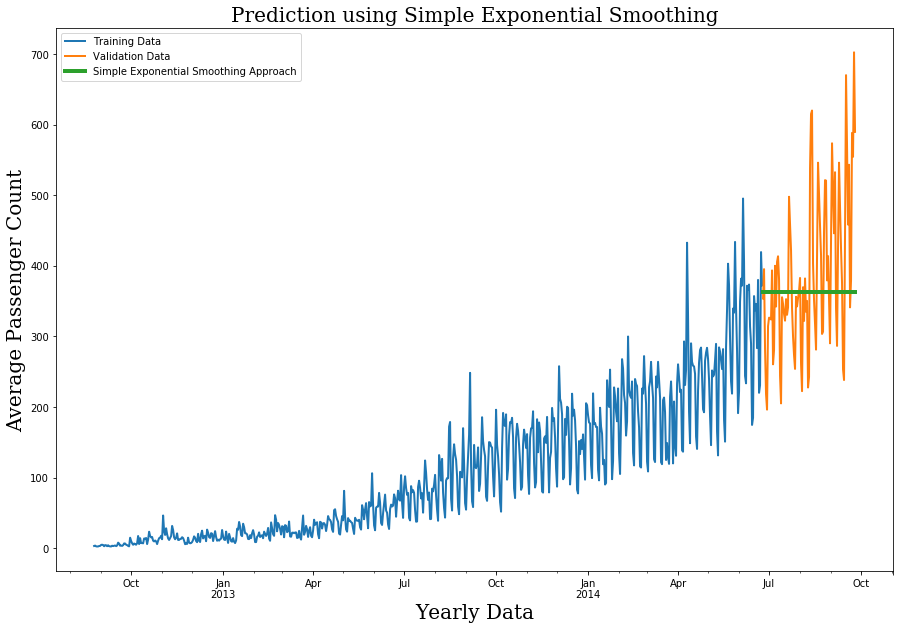

In [50]:
font_dict = {
    'family': 'serif',
    'size': 20
}
plt.figure(figsize=(15, 10))
training_data.Count.plot(label = 'Training Data', linewidth=2)
validation_data.Count.plot(label = 'Validation Data', linewidth=2)
ses_approach.SES.plot(label = 'Simple Exponential Smoothing Approach', linewidth=4)
plt.legend()
plt.xlabel('Yearly Data', fontdict = font_dict)
plt.ylabel('Average Passenger Count', fontdict = font_dict)
plt.title('Prediction using Simple Exponential Smoothing', fontdict = font_dict)
plt.savefig('Visualization/Prediction-Simple-Exponential-Smoothing.png')
plt.show()

In [51]:
rmse_ses_approach = sqrt(mean_squared_error(validation_data.Count, ses_approach.SES))
print("Simple Exponential Error is - ", rmse_ses_approach)

Simple Exponential Error is -  113.43708111884514


### Holtz's Linear Trend Model

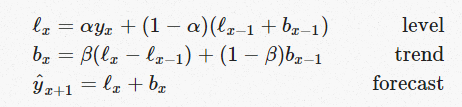

In [52]:
from IPython.display import Image
Image("Formula-Holts-Linear.png")

In [53]:
holt_approach = validation_data.copy()
holt_data = Holt(np.asarray(training_data.Count)).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
holt_approach['Holt'] = holt_data.forecast(len(validation_data))

In [54]:
holt_approach.Holt.head()

Datetime
2014-06-25    334.650767
2014-06-26    337.159011
2014-06-27    339.667256
2014-06-28    342.175500
2014-06-29    344.683745
Freq: D, Name: Holt, dtype: float64

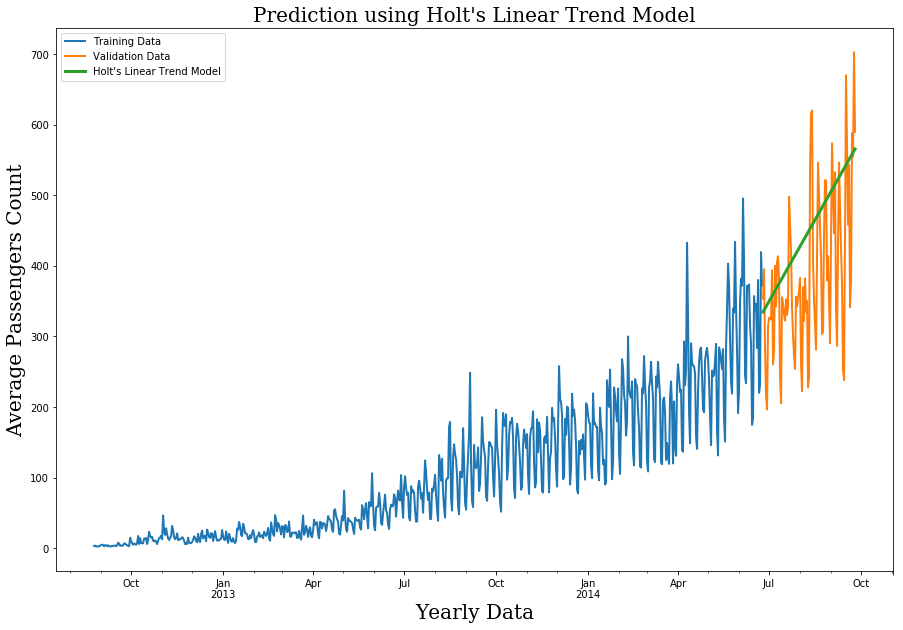

In [55]:
font_dict = {
    'family': 'serif',
    'size': 20
}
plt.figure(figsize=(15, 10))
training_data.Count.plot(label='Training Data', linewidth=2)
validation_data.Count.plot(label='Validation Data', linewidth=2)
holt_approach.Holt.plot(label="Holt's Linear Trend Model", linewidth=3)
plt.xlabel('Yearly Data', fontdict=font_dict)
plt.ylabel('Average Passengers Count', fontdict=font_dict)
plt.legend()
plt.title("Prediction using Holt's Linear Trend Model", fontdict=font_dict)
plt.savefig('Visualization/Prediction-Holt-Linear-Trend-Model.png')
plt.show()

In [56]:
rmse_holt_approach = sqrt(mean_squared_error(validation_data.Count, holt_approach.Holt))
print("Error in holt approach is - ", rmse_holt_approach)

Error in holt approach is -  112.94278345314041


### Holt's Winter Model (For seasonality)

#### Formula - Level, Trend, Seasonality

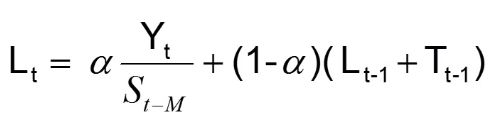

In [57]:
from IPython.display import Image
Image("Holts-Winter-Level.png")

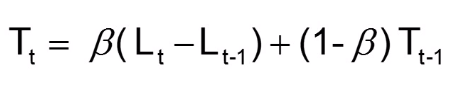

In [58]:
from IPython.display import Image
Image("Holts-Winter-Trend.png")

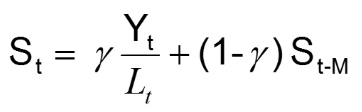

In [59]:
from IPython.display import Image
Image("Holts-Winter-Seasonality.png")

### Calculating Seasonal index

In [60]:
from statsmodels.tsa.api import ExponentialSmoothing

In [61]:
holt_winter_approach = validation_data.copy()

In [62]:
holt_winter_data = ExponentialSmoothing(np.asarray(training_data.Count), seasonal_periods=7, trend='add', seasonal='add').fit()
holt_winter_data_list = holt_winter_data.forecast(len(validation_data))
holt_winter_approach['Winter_Data'] = holt_winter_data_list
holt_winter_approach.Winter_Data.head()

Datetime
2014-06-25    387.359560
2014-06-26    369.135738
2014-06-27    355.562024
2014-06-28    247.089851
2014-06-29    246.193399
Freq: D, Name: Winter_Data, dtype: float64

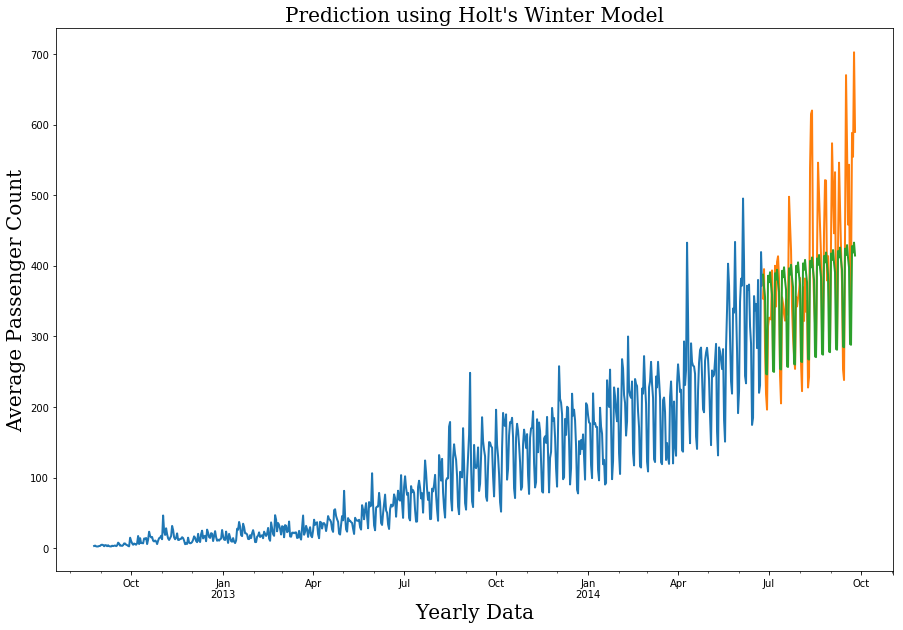

In [63]:
font_dict = {
    'family': 'serif',
    'size': 20
}
plt.figure(figsize=(15, 10))
training_data.Count.plot(label='Training Data', linewidth=2)
validation_data.Count.plot(label='Validation Data', linewidth=2)
holt_winter_approach.Winter_Data.plot(label="Holt's Winter Model", linewidth=2)
plt.xlabel('Yearly Data', fontdict = font_dict)
plt.ylabel('Average Passenger Count', fontdict = font_dict)
plt.title("Prediction using Holt's Winter Model", fontdict = font_dict)
plt.savefig('Visualization/Prediction-using-Holt-Winter-Model.png')
plt.show()

In [64]:
rmse_holt_winter_approach = sqrt(mean_squared_error(validation_data.Count, holt_winter_approach.Winter_Data))
print("Error in holt winter approach is - ", rmse_holt_winter_approach)

Error in holt winter approach is -  82.37900996094073


## ARIMA Model

## Check if the Data is stationary or not?

In [65]:
rolling_mean = data['Count'].rolling(24).mean()
rolling_std = data['Count'].rolling(24).std()

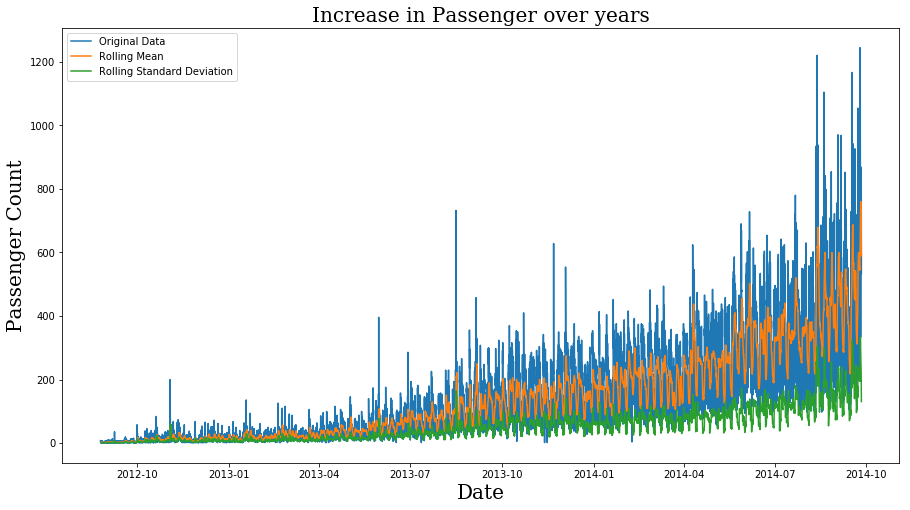

In [66]:
font_dict = {
    'family': 'serif',
    'size': 20
}
plt.figure(figsize=(15,8))
plt.plot(data['Count'], label='Original Data')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label='Rolling Standard Deviation')
plt.legend()
plt.xlabel('Date', fontdict = font_dict)
plt.ylabel('Passenger Count', fontdict = font_dict)
plt.title('Increase in Passenger over years', fontdict = font_dict)
plt.show()

In [67]:
def differencingMethod(dataset, differencing_value = 1):
    ## diffencing the data
    differenced = dataset - dataset.shift(differencing_value)
#     return differenced

    ## checking mean and standard deviation
    rolling_mean = differenced.rolling(12).mean()
    rolling_std = differenced.rolling(12).std()
    
    ## visualize the data to see if the mean, variance revolves around 0 or not.
    difference_label = 'Differenced Data-'+str(differencing_value)
    plt.figure(figsize=(18, 8))
    plt.plot(differenced, label = difference_label)
    plt.plot(rolling_mean, label = 'Mean')
    plt.plot(rolling_std, label = 'Variance')
    plt.xlabel('Date')
    plt.ylabel('Count of Passengers')
    plt.legend()
    
    ## printing mean, standard deviation
    print('Rolling Mean is:', np.mean(rolling_mean))
    print('Rolling Standard Deviation is:', np.mean(rolling_std))

In [68]:
import seaborn as sns
sns.set()

Rolling Mean is: 0.03623148756110015
Rolling Standard Deviation is: 30.785121034962486


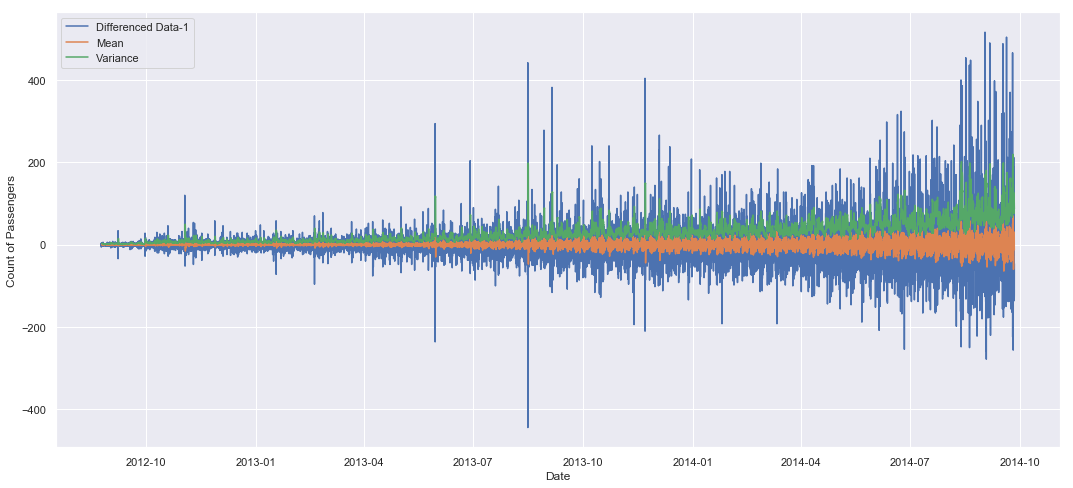

In [69]:
differencingMethod(dataset=data['Count'])

Rolling Mean is: 0.07304149566803467
Rolling Standard Deviation is: 40.6209500691928


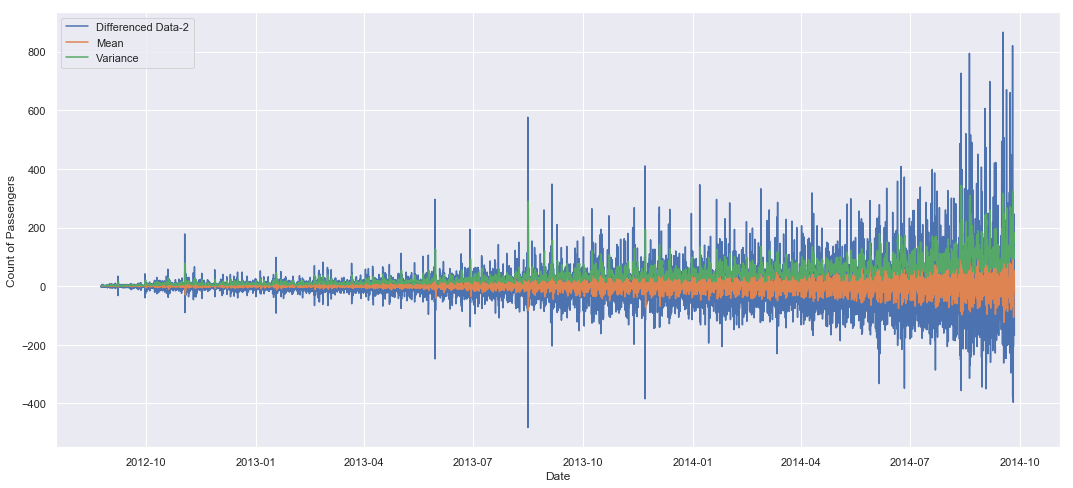

In [70]:
differencingMethod(dataset=data['Count'], differencing_value=2)

### Observations - 
Taking differencing value as 1.

## Plotting ACF and PACF graph for the differencing data.

In [71]:
from statsmodels.tsa.stattools import acf, pacf

In [72]:
differenced_data = data['Count'] - data['Count'].shift(1)

In [73]:
differenced_data.dropna(inplace=True)

In [74]:
lag_acf = pd.Series(acf(differenced_data, nlags=10))
lag_pacf = pd.Series(pacf(differenced_data, nlags=10, method='ols'))

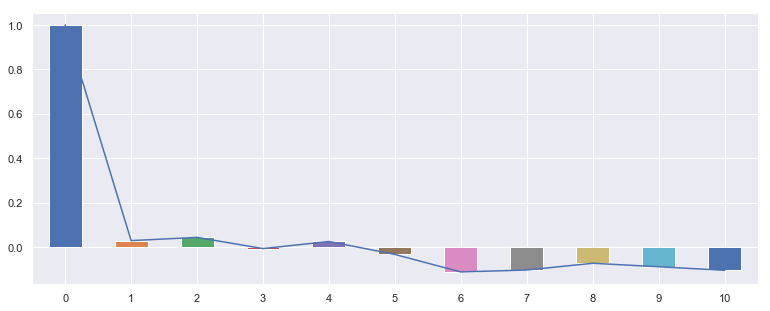

In [75]:
plt.figure(figsize=(13, 5))
lag_acf.plot.bar()
lag_acf.plot()

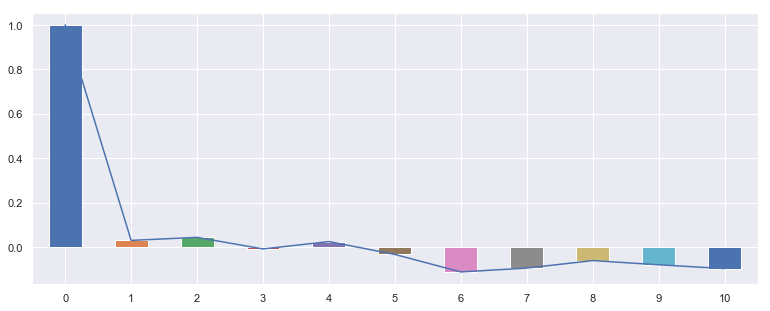

In [76]:
plt.figure(figsize=(13, 5))
lag_pacf.plot.bar()
lag_pacf.plot()

In [77]:
from statsmodels.tsa.arima_model import ARIMA

In [78]:
training_data.shape[0]

669

In [79]:
validation_data.shape[0]

93

In [80]:
history = []

In [81]:
history = [value for value in training_data['Count']]
predictions = []

In [82]:
len(history)

669

In [196]:
training_data.shape[0]

669

In [197]:
for i in range(validation_data.shape[0]):
#     if (i==7):
#         break
    arima_model = ARIMA(history, order=(5, 1, 1))
    arima_model_fit = arima_model.fit(disp=-1)
    output = arima_model_fit.forecast()[0][0]
    predictions.append(output)
    actual_value = validation_data['Count'].iloc[i]
    history.append(actual_value)

## Visualizing the predictions made

In [198]:
observed_values = pd.Series(history, index=daily_data.index)

In [199]:
observed_values.head()

Datetime
2012-08-25    3.166667
2012-08-26    3.666667
2012-08-27    2.583333
2012-08-28    2.416667
2012-08-29    2.500000
Freq: D, dtype: float64

In [200]:
predicted_values = pd.Series(predictions, index=validation_data.index)

In [201]:
predicted_values.head()

Datetime
2014-06-25    284.485773
2014-06-26    369.001654
2014-06-27    343.799180
2014-06-28    217.424992
2014-06-29    300.430382
Freq: D, dtype: float64

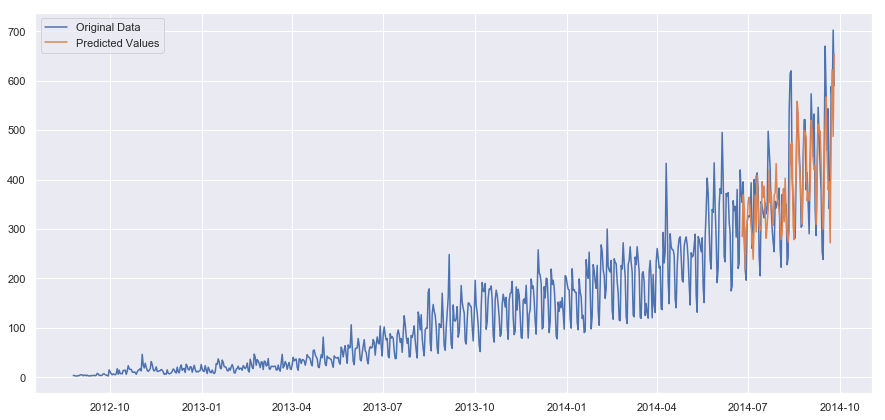

In [202]:
plt.figure(figsize=(15, 7))
plt.plot(observed_values, label='Original Data')
plt.plot(predicted_values, label='Predicted Values')
plt.legend()

## Checking error

In [203]:
arima_error = sqrt(mean_squared_error(validation_data['Count'], predicted_values.values))

In [204]:
arima_error

74.01902054066397

## Making predictions of test dataset

In [83]:
test_data = pd.read_csv('data/Test.csv')

In [84]:
test_data.head()

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00


In [85]:
test_data.Datetime = pd.to_datetime(test_data.Datetime, infer_datetime_format=True)

In [86]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5112 entries, 0 to 5111
Data columns (total 2 columns):
ID          5112 non-null int64
Datetime    5112 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 80.0 KB


## Making ARIMA model for hourly data

In [87]:
data.shape[0]

18288

In [88]:
size = int((data.shape[0]*0.7))
size

12801

In [89]:
hourly_training = data['Count'][:size]
hourly_test = data['Count'][size:]

In [90]:
hourly_training.head()

Datetime
2012-08-25 00:00:00    8
2012-08-25 01:00:00    2
2012-08-25 02:00:00    6
2012-08-25 03:00:00    2
2012-08-25 04:00:00    2
Name: Count, dtype: int64

In [93]:
hourly_history = []
hourly_history = [value for value in hourly_training]
hourly_predictions = []

In [94]:
for i in range(hourly_test.shape[0]):
#     if (i==7):
#         break
    arima_model = ARIMA(hourly_history, order=(2, 1, 0))
    arima_model_fit = arima_model.fit(disp=-1)
    output = arima_model_fit.forecast()[0][0]
    hourly_predictions.append(output)
    actual_value = hourly_test.iloc[i]
    hourly_history.append(actual_value)

c:\users\jatinder\appdata\local\programs\python\python36\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
c:\users\jatinder\appdata\local\programs\python\python36\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
c:\users\jatinder\appdata\local\programs\python\python36\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated

In [95]:
len(hourly_test)

5487

In [96]:
len(hourly_predictions)

5487

In [97]:
hourly_predictions

[172.89394619247722,
 206.6655435268015,
 198.33618810400083,
 181.86394269871872,
 186.89835290217007,
 182.82124141294352,
 180.2139721700324,
 179.99891127534255,
 167.7444021811085,
 129.08598272973904,
 165.73944354754724,
 188.16678954793915,
 205.93635320230987,
 222.18653187057635,
 274.9971843094549,
 268.4697504209568,
 246.60892184257202,
 229.81725336421553,
 215.61605150650834,
 178.83109946421436,
 199.99177313257823,
 183.22333421071625,
 248.1749436967064,
 223.6371665605793,
 240.44982563069212,
 321.3511956448593,
 364.33935478755757,
 387.64051725598915,
 391.9803041308394,
 385.0349543550196,
 389.2246922036019,
 369.0381699836913,
 362.3125395969773,
 325.15929370947686,
 335.4394499906452,
 325.9122883215633,
 313.3789040882263,
 317.1813974916862,
 330.35807446271536,
 307.59812028722064,
 226.58463253344007,
 176.6003549626138,
 168.10193926697409,
 139.88254360818743,
 149.76084407370843,
 125.82683972300927,
 88.36659074515858,
 113.50452435529606,
 123.587607

In [98]:
hourly_prediction_series = pd.Series(hourly_predictions, index=hourly_test.index)

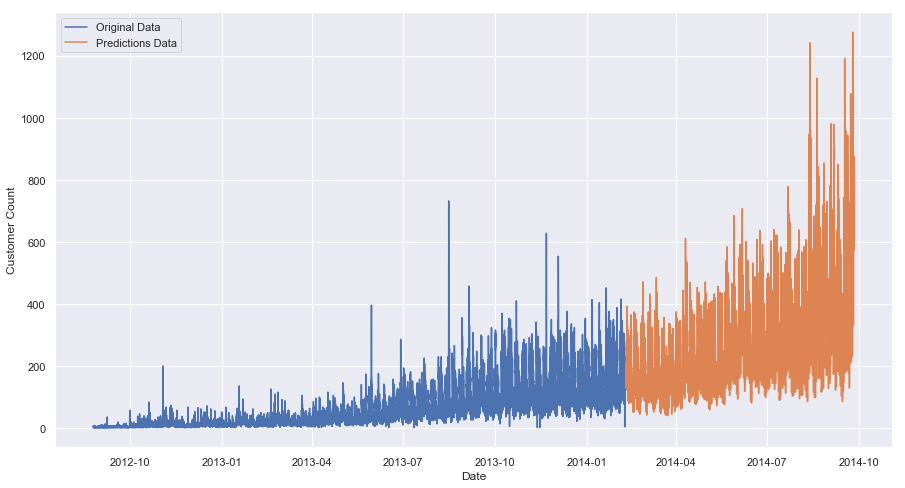

In [99]:
plt.figure(figsize=(15, 8))
plt.plot(hourly_training, label='Original Data')
plt.plot(hourly_prediction_series, label='Predictions Data')
plt.xlabel('Date')
plt.ylabel('Customer Count')
plt.legend()

## Computing error

In [100]:
arima_error = sqrt(mean_squared_error(hourly_test, hourly_prediction_series))
arima_error

64.33729982610868

### ARIMA Forecasting

In [112]:
len(test_data)

5112

In [119]:
forecasted_values = arima_model_fit.forecast(steps=5112)[0]

In [122]:
forecasted_values

array([575.321483  , 569.95421992, 569.63073654, ..., 726.29225057,
       726.32298083, 726.35371109])

In [127]:
forecasted_df = pd.DataFrame(forecasted_values)

In [132]:
test_data = test_data.set_index('Datetime')

In [133]:
test_data.head()

,ID
Datetime,
2014-09-26 00:00:00,18288
2014-09-26 01:00:00,18289
2014-09-26 02:00:00,18290
2014-09-26 03:00:00,18291
2014-09-26 04:00:00,18292


In [134]:
test_data.index = pd.to_datetime(test_data.index, infer_datetime_format=True)

In [135]:
test_data.index

DatetimeIndex(['2014-09-26 00:00:00', '2014-09-26 01:00:00',
               '2014-09-26 02:00:00', '2014-09-26 03:00:00',
               '2014-09-26 04:00:00', '2014-09-26 05:00:00',
               '2014-09-26 06:00:00', '2014-09-26 07:00:00',
               '2014-09-26 08:00:00', '2014-09-26 09:00:00',
               ...
               '2015-04-26 14:00:00', '2015-04-26 15:00:00',
               '2015-04-26 16:00:00', '2015-04-26 17:00:00',
               '2015-04-26 18:00:00', '2015-04-26 19:00:00',
               '2015-04-26 20:00:00', '2015-04-26 21:00:00',
               '2015-04-26 22:00:00', '2015-04-26 23:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=5112, freq=None)

In [136]:
forecasted_df.index = test_data.index

In [137]:
forecasted_df.head()

,0
Datetime,
2014-09-26 00:00:00,575.321483
2014-09-26 01:00:00,569.954220
2014-09-26 02:00:00,569.630737
2014-09-26 03:00:00,569.418607
2014-09-26 04:00:00,569.427258


In [140]:
forecasted_df.rename(columns={0: 'Count'}, inplace=True)

In [141]:
forecasted_df.head()

,Count
Datetime,
2014-09-26 00:00:00,575.321483
2014-09-26 01:00:00,569.954220
2014-09-26 02:00:00,569.630737
2014-09-26 03:00:00,569.418607
2014-09-26 04:00:00,569.427258


In [143]:
forecasted_df.to_csv('forecast.csv')